# Chapter.3 Single-variate Linear Regression without Bias Term

## Programming Assignment.3-06 SVLR without Bias Term for One Sample

PA 3-06에서는 PA 3-05에서 만든 dataset generator를 통해 dataset을 만들고,  
PA 3-04에서 만든 basic building node들을 이용하여 bias term이 없는 single-variate linear model을 학습시킵니다.

PA 3-06은 다음의 단계들을 통해 SVLR without bias term model의 학습원리를 확인합니다.

<ul>
    <li> Step.1 Dataset Preparation </li>
    <li> Step.2 Model/Loss Implementation </li>
    <li> Step.3 Learning </li>
    <li> Step.4 Predictor Visualization </li>
</ul>

먼저 다음의 셀을 실행시켜 필요한 library들과 basic nodes, dataset generator를 import하세요.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import os
import sys
utils_path = '/Users/sanghyuk/Documents/deep_learning_math/utils'
if utils_path not in sys.path:    
    sys.path.append(utils_path)
print(os.sys.path[-1], '\n')

import basic_nodes as nodes
from LR_dataset_generator import LR_dataset_generator
    
plt.style.use('seaborn')
np.random.seed(0)

***
## Step.1 Dataset Preparation

SVLR without bias term을 위한 dataset은
$$y = ax$$
의 식에서부터 만들어집니다.

그리고 LR_dataset_generator는 coefficient를 지정해주지 않으면 weight는 1, bias는 0으로 설정해주기 때문에  
feature_dim만 1로 설정해주면
$$y = x$$
에서부터 dataset을 만듭니다.

***
**Programming**  
$$y = x$$
LR_dataset_generator를 이용하여 dataset을 만드세요.

Text(0, 0.5, 'Y Data')

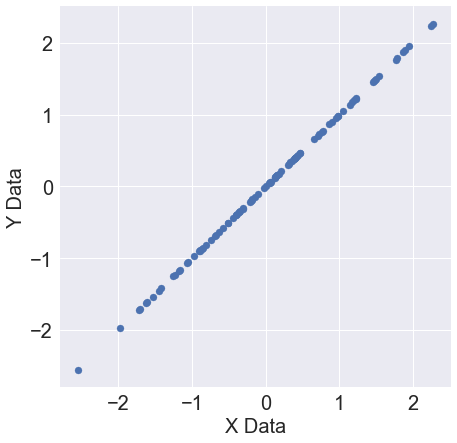

In [5]:
np.random.seed(0)

##### Start Your Code(Dataset Preparation) #####
data_gen = LR_dataset_generator(feature_dim = 1)
dataset = data_gen.make_dataset()
##### End Your Code(Dataset Preparation) #####

x_data, y_data = dataset[:,:-1], dataset[:,-1]

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(x_data[:,1], y_data)
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_xlabel("X Data", fontsize = 20)
ax.set_ylabel("Y Data", fontsize = 20)

***
## Step.2 Model/Loss Implementation

Step.2에서는 학습에 필요한 model과 loss function을 basic building node들을 이용하여 구현합니다.  
강의에서 사용된 model과 loss는 다음과 같습니다.
<img src='./imgs/3_06_01.png' width = 600>

따라서 model을 implementation하기 위해선 mul_node가 필요하고,  
loss를 implementation하기 위해선 minus_node와 square_node가 필요합니다.

***
**Programming**  
SVLR without bias term model과 square error loss를 구현하는데 필요한 basic building node를 instantiation하세요.  

In [7]:
##### Start Your Code(Model Implementation) #####
node1 = nodes.mul_node()
##### End Your Code(Model Implementation) #####


##### Start Your Code(Loss Implementation) #####
node2 = nodes.minus_node()
node3 = nodes.square_node()
##### End Your Code(Loss Implementation) #####

***
## Step.3 Learning

Step.3에서는 Step.1에서 만든 dataset과 Step.2에서 만든 node들을 이용하여 학습을 진행합니다.  
deep learning에서의 학습은 model이 가지고 있는 learnable parameter인 $\theta$를 대상으로 하고,  
1. forward propagation에서 loss를 계산한 뒤,  
2. chain rule을 이용한 backpropagation을 통해 loss에 대한 $\theta$의 partial derivative를 구합니다.  
3. 그리고 gradient descent method를 이용해 learnable parameter $\theta$를 iterative하게 학습시킵니다.

***
**Programming**  
SVLR without bias term model을 학습시키세요.

이를 위하여 먼저 학습에 필요한 parameter를 설정해줍니다. 설정해줄 parameter들은 다음과 같습니다.
- initial theta = 0.1
- learning rate = 0.01
- total epoch = 1

그리고 실제 model을 학습시켜봅니다.

Text(0.5, 1.0, '$\\mathcal{L}$')

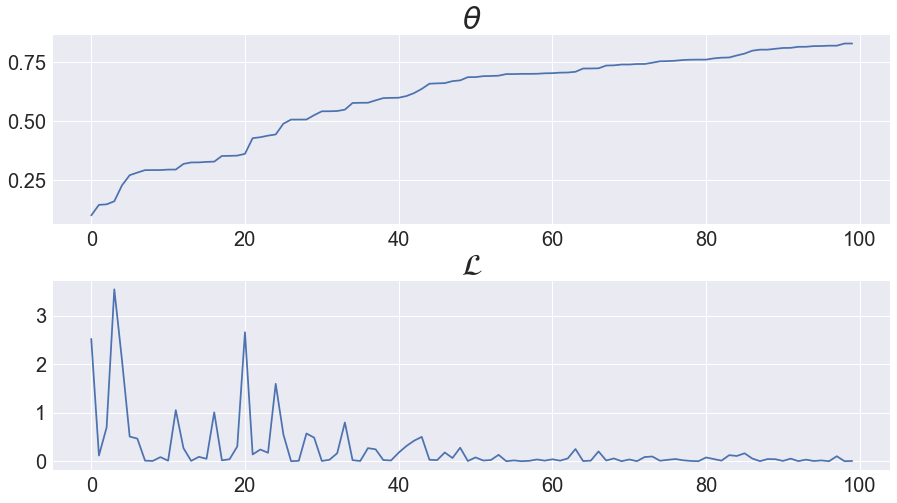

In [8]:
##### Start Your Code(Learning Preparation) #####
th = 0.1
lr = 0.008
epochs = 1
##### End Your Code(Learning Preparation) #####

th_list = []
loss_list = []

for epoch in range(epochs):
    for data_sample in dataset:
        ##### Start Your Code(x, y Allocation) #####
        x, y = data_sample[1], data_sample[-1]
        ##### End Your Code(x, y Allocation) #####
        
        
        ##### Start Your Code(Forward Propagation) #####
        z1 = node1.forward(th, x)
        z2 = node2.forward(y, z1)
        l = node3.forward(z2)
        ##### End Your Code(Forward Propagation) #####
        
        
        ##### Start Your Code(Backpropagation) #####
        dz2 = node3.backward(1)
        dy, dz1 = node2.backward(dz2)
        dth, dx = node1.backward(dz1)
        ##### End Your Code(Backpropagation) #####
        
        th_list.append(th)
        loss_list.append(l)
        
        ##### Start Your Code(Gradient Descent Method) #####
        th = th - lr*dth
        ##### End Your Code(Gradient Descent Method) #####
        
fig, ax = plt.subplots(2, 1, figsize = (15,8))
fig.subplots_adjust(hspace = 0.3)
ax[0].plot(th_list)
ax[1].plot(loss_list)
ax[0].tick_params(axis = 'both', labelsize = 20)
ax[1].tick_params(axis = 'both', labelsize = 20)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)

***
## Step.4 Predictor Visualization

다음의 셀을 실행시켜 initial model이 target function에 가까워지도록 학습이 일어나는지 확인하세요.  
그리고 $\theta, \mathcal{L}$의 변화와 predictor의 변화를 비교하며 학습의 원리를 분석해보세요.  

**Further Works**   
- predictor를 완벽히 학습시키기 위해서는 Step.3에서 어떤 변화를 줘야하는지 생각해보고, 수정 후 Step.3, Step.4를 다시 실행시켜보세요.
- loss가 감소하면서 fluctuation이 심하게 일어나는 이유에 대하여 분석하세요.

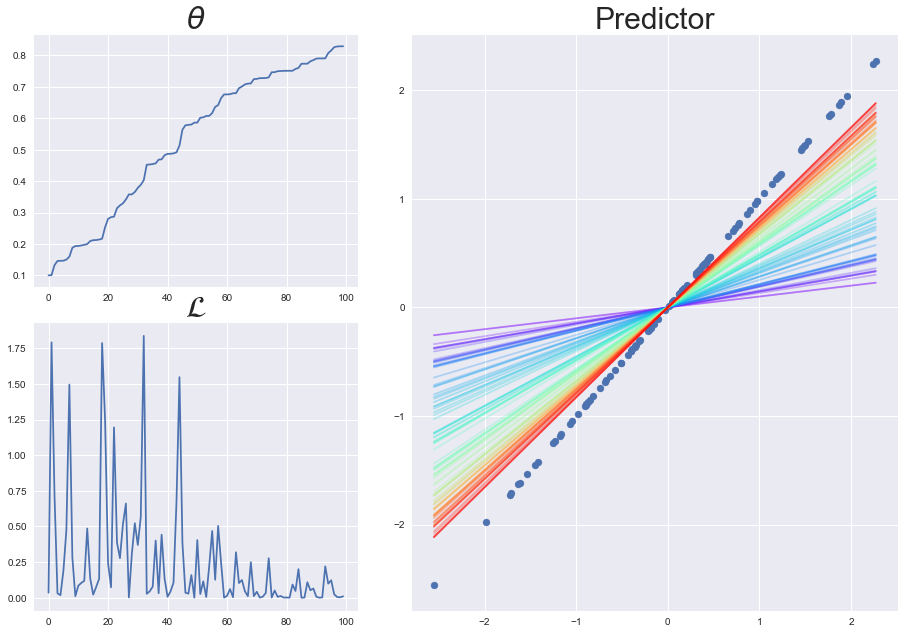

In [171]:
fig = plt.figure(figsize = (15,10))
left, bottom = 0.1, 0.1
width, height = 0.3, 0.4
spacing = 0.05

ax_th = fig.add_axes([left, bottom + height + spacing, width,
                        1-(2*bottom + height + spacing)])
ax_loss = fig.add_axes([left, bottom, width, height])
ax_pred = fig.add_axes([left + width + spacing, bottom,
                       1 - (2*left + width + spacing), 2*height])

ax_th.set_title(r'$\theta$', fontsize = 30)
ax_loss.set_title(r'$\mathcal{L}$', fontsize = 30)
ax_pred.set_title('Predictor', fontsize = 30)
ax_th.plot(th_list)
ax_loss.plot(loss_list)

ax_pred.scatter(dataset[:,1], dataset[:,-1])
cmap = cm.get_cmap('rainbow', lut = len(th_list))
x_range = np.array([np.min(dataset[:,1]), np.max(dataset[:,1])])
for th_idx, th in enumerate(th_list):
    pred = th*x_range
    
    ax_pred.plot(x_range, pred, color = cmap(th_idx),
                alpha = 0.3)
    

***
**Programming**  
Step.3에서 작성한 training code를 추후 여러번 이용하기 때문에 함수화 해줍니다.

다음 정의되는 trainer 함수의 input/output은 다음과 같습니다.
- INPUT : dataset, initial theta, learning rate, total epochs
- OUTPUT : $\theta, \mathcal{L}$와 predictor의 시각화

이를 위해 Step.3에서 작성한 코드를 이용해 다음 함수를 채우세요.

In [178]:
def trainer(dataset, th, lr, epochs):
    ##### Start Your Code(trainer Functionalization) #####
    th_list = []
    loss_list = []

    for epoch in range(epochs):
        for data_sample in dataset:
            x, y = data_sample[1], data_sample[-1]

            z1 = node1.forward(th, x)
            z2 = node2.forward(y, z1)
            l = node3.forward(z2)

            dz2 = node3.backward(1)
            dy, dz1 = node2.backward(dz2)
            dth, dx = node1.backward(dz1)

            th_list.append(th)
            loss_list.append(l)

            th = th - lr*dth
    ##### End Your Code(trainer Functionalization) #####
    
    fig = plt.figure(figsize = (15,10))
    left, bottom = 0.1, 0.1
    width, height = 0.3, 0.4
    spacing = 0.05

    ax_th = fig.add_axes([left, bottom + height + spacing, width,
                            1-(2*bottom + height + spacing)])
    ax_loss = fig.add_axes([left, bottom, width, height])
    ax_pred = fig.add_axes([left + width + spacing, bottom,
                           1 - (2*left + width + spacing), 2*height])

    ax_th.set_title(r'$\theta$', fontsize = 30)
    ax_loss.set_title(r'$\mathcal{L}$', fontsize = 30)
    ax_pred.set_title('Predictor', fontsize = 30)
    ax_th.plot(th_list)
    ax_loss.plot(loss_list)

    ax_pred.scatter(dataset[:,1], dataset[:,-1])
    cmap = cm.get_cmap('rainbow', lut = len(th_list))
    x_range = np.array([np.min(dataset[:,1]), np.max(dataset[:,1])])
    for th_idx, th in enumerate(th_list):
        pred = th*x_range

        ax_pred.plot(x_range, pred, color = cmap(th_idx),
                    alpha = 0.3)

***
**Programming**  

위의 trainer 함수를 이용하여 다음의 조건에서의 학습을 진행하세요.  
- initial theta = 0.1
- learning rate = 0.008
- epochs = 1

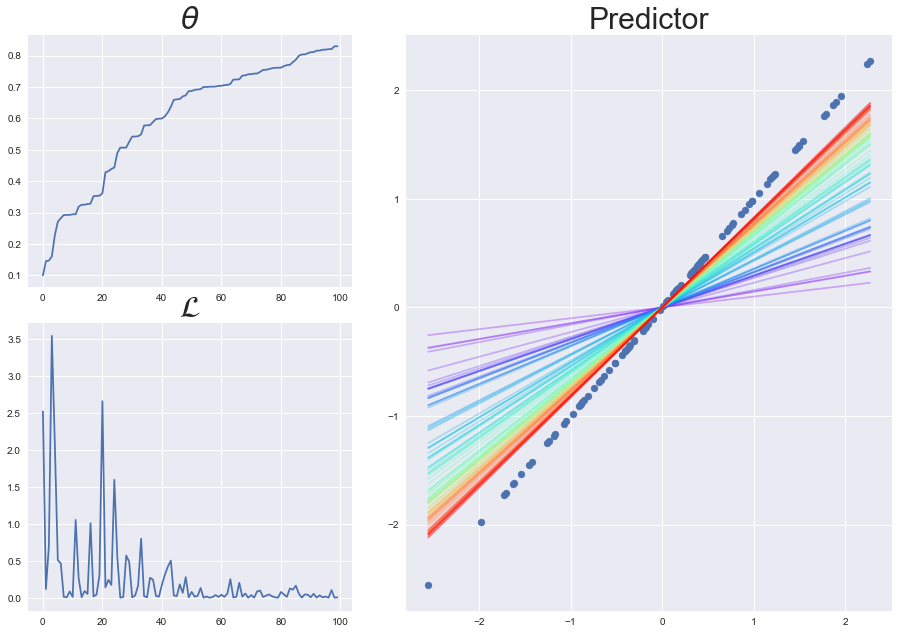

In [180]:
##### Start Your Code(Learning Preparation) #####
th = 0.1
lr = 0.008
epochs = 1
##### End Your Code(Learning Preparation) #####


##### Start Your Code(trainer Function) #####
th_list, loss_list = trainer(dataset, th, lr, epochs)
##### End Your Code(trainer Function) #####